# Data Project From Gett: Insights from failed orders

### Table of contents:

Introduction <br>
Data Description <br>
Assignments <br>
Data exploration <br>
Answer Questions

### Introduction:
Gett, previously known as GetTaxi, is a technology platform solely focused on corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in the application, the matching system searches for the most relevant drivers and offers them the order. In this task, we would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

### Data Description:

We have two data sets: **data_orders** and **data_offers**, both being stored in a CSV format. The data_orders data set contains the following columns:

* order_datetime - time of the order
* origin_longitude - longitude of the order
* origin_latitude - latitude of the order
* m_order_eta - time before order arrival
* order_gk - order number
* order_status_key - status, an enumeration consisting of the following mapping:
    - 4 - cancelled by client,
    - 9 - cancelled by system, i.e., a reject
    
* is_driver_assigned_key - whether a driver has been assigned
* cancellation_time_in_seconds - how many seconds passed before cancellation
* The data_offers data set is a simple map with 2 columns:

* order_gk - order number, associated with the same column from the orders data set
* offer_id - ID of an offer

### Assignemts:
Please complete the following tasks.

1) Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?
2) Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
3) Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
4) Plot the distribution of average ETA by hours. How can this plot be explained?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

orders = pd.read_csv("data_orders.csv")
offers = pd.read_csv("data_offers.csv")

In [17]:
display(orders.shape)
display(offers.shape)

(10716, 8)

(334363, 2)

In [18]:
# random_state ensures that we get the same results every time we run the method with the same arguments
orders.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10309,00:29:14,-0.966062,51.454821,NaN,3000555146103,4,0,44.0
6705,01:28:45,-0.970472,51.456725,NaN,3000595870644,4,0,121.0
304,08:22:36,-0.916708,51.439852,NaN,3000627783633,9,0,NaN
9143,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0
10593,04:39:55,-0.946358,51.439779,NaN,3000554645524,4,0,121.0
8654,08:05:02,-0.967327,51.449395,598.0,3000592772077,4,1,48.0
3919,00:21:47,-0.971597,51.457574,NaN,3000624492441,4,0,180.0
4337,20:26:40,-0.971296,51.458115,NaN,3000628755869,4,0,104.0
6931,07:25:39,-0.942301,51.474812,NaN,3000628430595,4,0,44.0
967,13:41:31,-0.952194,51.444067,NaN,3000623591189,9,0,NaN


In [19]:
offers.sample(n=10, random_state=42)

,order_gk,offer_id
244971,3000627481054,300052086404
236783,3000631282042,300052342376
22714,3000624367715,300051909011
306983,3000557436646,300050769980
170256,3000588131807,300051201442
316173,3000629756224,300052250019
234398,3000625018320,300051967737
122107,3000629082264,300052196687
60909,3000588606991,300051225443
52998,3000629981908,300052274857


Next, we will merge the two dataframes into one for easier manipulation, using the Pandas **merge()** method.<br>
Similar to SQL joins, we specify how we want to merge (inner) and on which column (order_gk).

In [20]:
df = orders.merge(right=offers, how="inner", on="order_gk")
df.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


We need to edit the data in **is_driver_assigned** & **order_status_key** to make it more descriptive and clear for users.<br>
Instead of 1/0 in **is_driver_assigned** we can use Yes/No.<br>
Instead of 4/9 in **order_status_key** we can use "Client Cancelled"/"System Reject"<br><br>
We can also make the column names more descriptive and less technical.

In [21]:
df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"] == 1, "Yes", "No")
df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")

df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [22]:
df = df.rename(columns={
    "order_datetime" : "order_time"
})

In [23]:
df.sample(n=10, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Reject
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Client Cancelled
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Reject
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Client Cancelled
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Client Cancelled


Ready now to start answering the questions.

### Question 1

* Build a distribution of orders based on reasons for failure.
* Cancellation before and after driver assignment
* Reasons for order rejections

Analyze the resulting plot, which category has the highest number of orders?

Solution: use groupby method to group the df by the is_driver_assigned and order_status columns, then count the rows in each group.

In [24]:
# shows the count of order_gk values for each combination of all is_driver_assigned & order_status values
# is_driver_assigned values: [No, Yes]
# order_status values: [Client Cancelled, System Reject]
# Then display the count of all rows where the combination is found
df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

In [35]:
df_q1 = df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")
df_q1

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
order_gk                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_gk                       4

Observations:
* High number of client cancellations *before* a driver is assigned, maybe the wait time is too long? (question for later)
* Only 4 requests were rejected by the system *after* a driver was assigned. Outlier that needs to be investigated further.

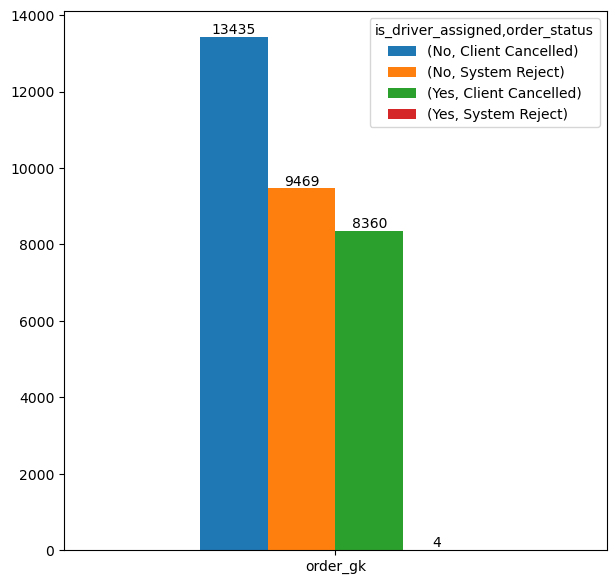

In [50]:
# plot the pivot table into a bar plot
fig = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

# annotate the bars with the values
for c in fig.containers:
    fig.bar_label(c, label_type='edge')

### Question 2
**Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?**

This question builds on the previous one by delving deeper into the analysis of failed orders. Rather than just plotting the distribution of fails by category, we want to know when these fails occur, and if there's a specific period in the day when one category prevails over others.

In [54]:
# extract hour from time column
df["order_hour"] = df["order_time"].str.split(":").apply(lambda split: split[0])

In [56]:
# print a small sample to make sure the result is what we need
df.sample(n=5, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled,10
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled,09
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled,02
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled,21


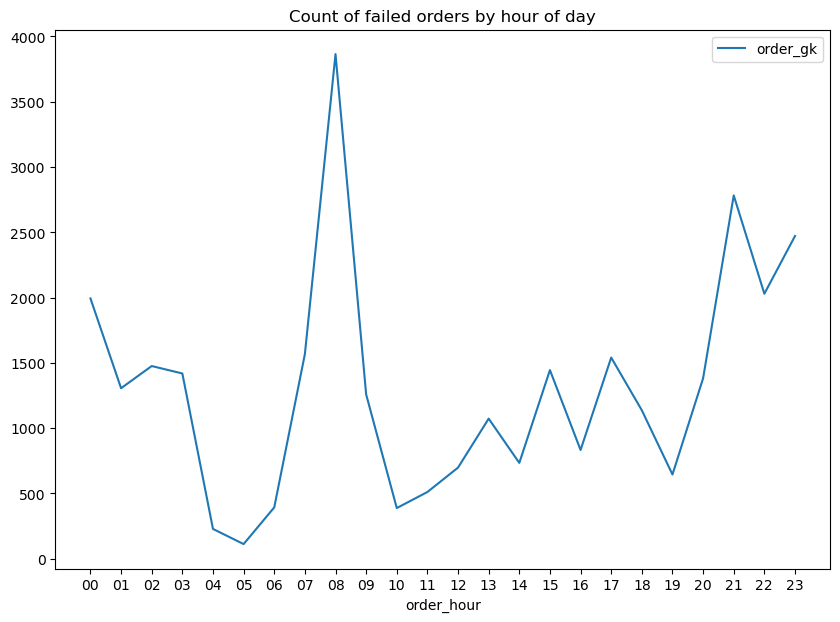

In [57]:
_ = df.groupby(by='order_hour')['order_gk'].count().plot(figsize=(10, 7), legend=True, xticks=range(0, 24), title='Count of failed orders by hour of day')

As a first step towards a DataFrame that contains such aggregated information we group-by by the order hour, the driver-assigned flag, and the order status, and then count the number of order_gk.

In [59]:
grouped_q2 = df.groupby(by=['order_hour', 'is_driver_assigned', 'order_status'])['order_gk'].count()
grouped_q2

order_hour  is_driver_assigned  order_status    
00          No                  Client Cancelled     957
                                System Reject        706
            Yes                 Client Cancelled     326
                                System Reject          4
01          No                  Client Cancelled     633
                                                    ... 
22          No                  System Reject        660
            Yes                 Client Cancelled     415
23          No                  Client Cancelled    1144
                                System Reject        883
            Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64

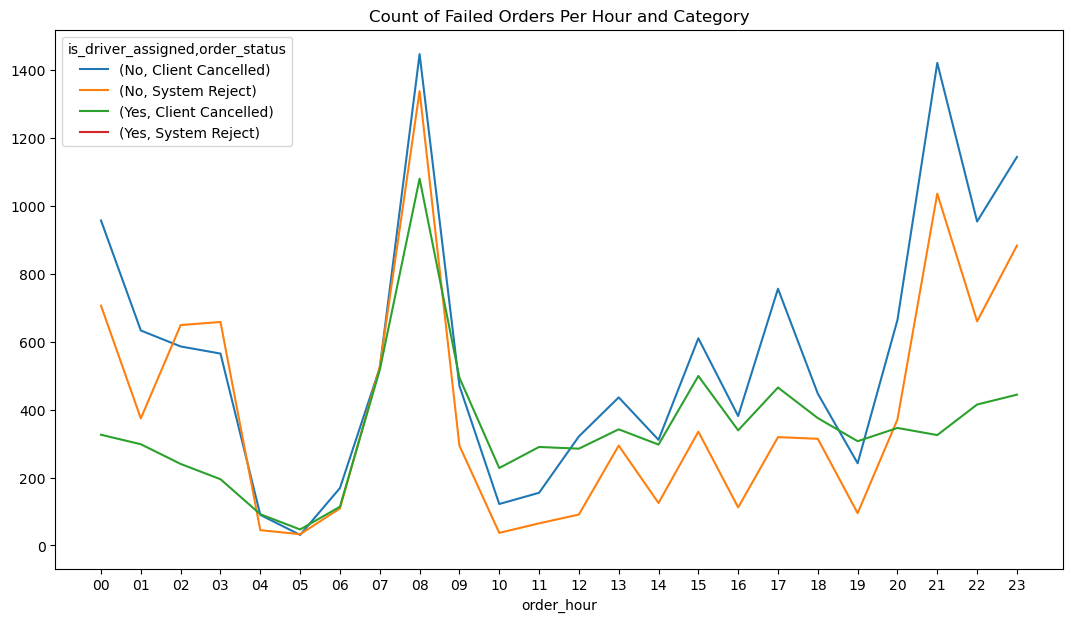

In [61]:
_ = grouped_q2.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category")

The four system rejects with the assigned driver occurred around midnight (see the output of the grouped DataFrame). The rest of the categories follow similar distribution, with the client cancellations with the assigned driver having a substantially lower count during the night hours.

## Question 3
#### Plot the average time to cancellation with and without driver, by hour. Can we draw any conclusions from this plot?

To solve this question we are going to take the same approach as the previous question.

First, we will aggregate the DataFrame by the order hour and the driver-assignment flag. Then, we will aggregate the cancellations_time_in_seconds column with the function mean. This will give us the required, aggregated information.

In [63]:
grouped_q3 = df.groupby(by=['order_hour', 'is_driver_assigned'])['cancellations_time_in_seconds'].mean()
grouped_q3

order_hour  is_driver_assigned
00          No                    115.126437
            Yes                   276.082822
01          No                    100.593997
            Yes                   296.312081
02          No                    121.305461
            Yes                   301.466667
03          No                    129.182301
            Yes                   368.682051
04          No                    100.733333
            Yes                   245.250000
05          No                    102.838710
            Yes                   156.617021
06          No                    202.952663
            Yes                   225.508772
07          No                    141.177820
            Yes                   177.640232
08          No                    132.625432
            Yes                   172.896296
09          No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes         

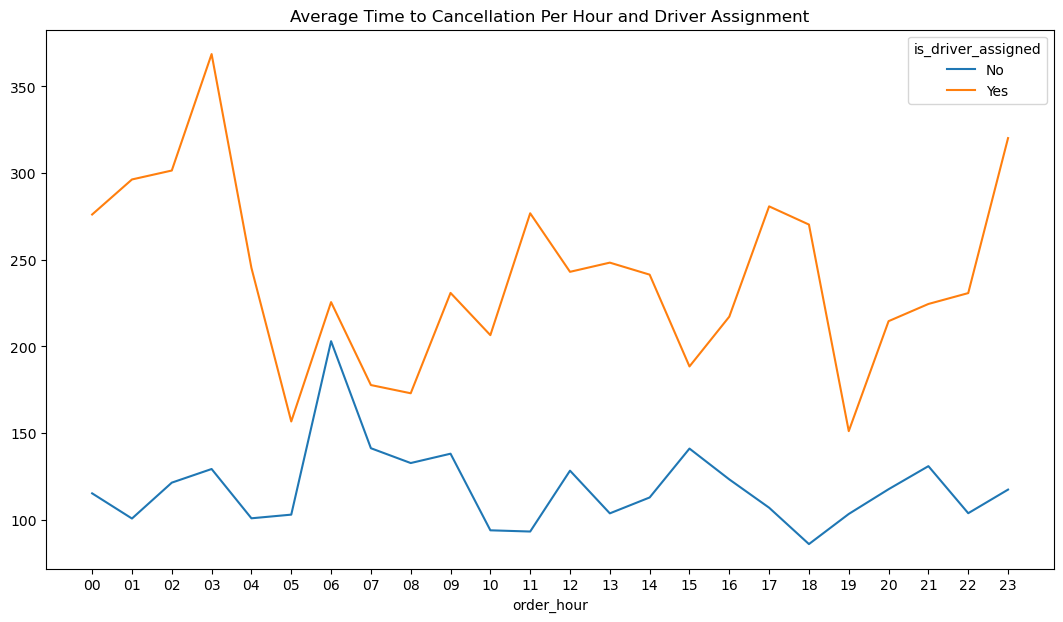

In [64]:
_ = grouped_q3.reset_index().pivot(index="order_hour",
                                   columns="is_driver_assigned",
                                   values="cancellations_time_in_seconds").plot(xticks=range(0, 24),
                                                                                figsize=(13, 7),
                                                                                title="Average Time to Cancellation Per Hour and Driver Assignment")

The average time to cancellation is higher on orders with an assigned driver than without, for each hour without exception. The peak occurs at 3 A.M. At this time there are a lot of client cancellations, so a logical explanation would be that clients have waited too long for the driver.

## Question 4
#### Plot the distribution of average ETA by hours. How can this plot be explained?

The solution to this question is quite straightforward. We simply group-by the DataFrame on the order hour, and aggregate the m_order_eta column with a mean function. Then, we plot the resulting DataFrame. The result is in the cell immediately below. The line very closely matches the count of failed orders per hour, <b>indicating that the number of failed orders increases as the average waiting time of the client increases.</b>

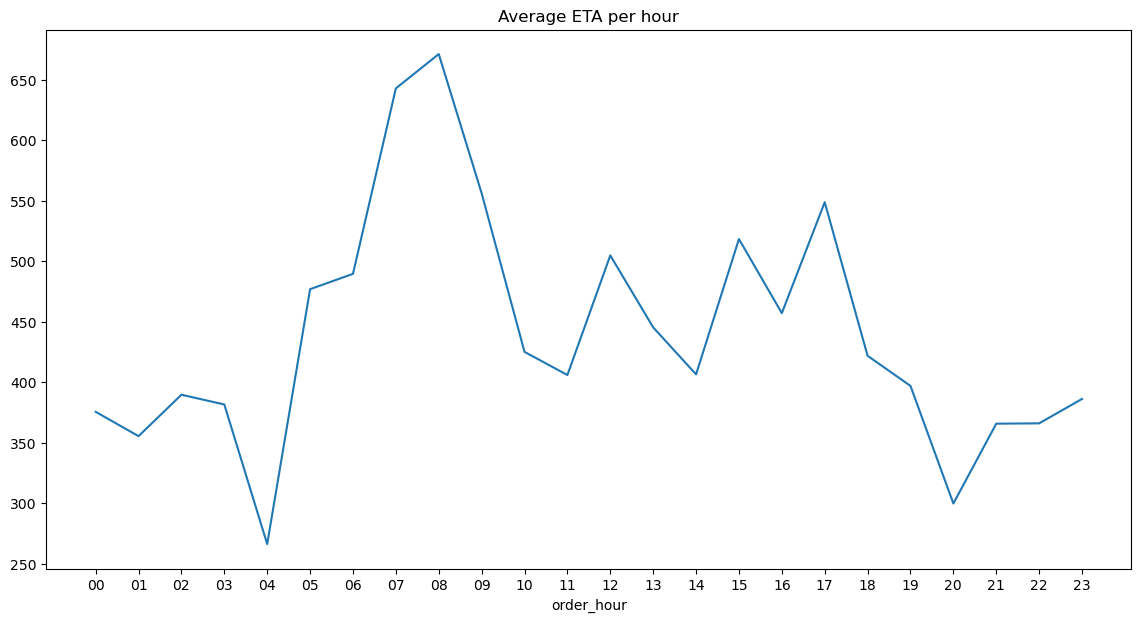

In [65]:
_ = df.groupby(by="order_hour")["m_order_eta"].mean().plot(figsize=(14, 7),
                                                           xticks=range(0, 24),
                                                           title="Average ETA per hour")